<a href="https://colab.research.google.com/github/alexDahersh/Data-Science-fund./blob/main/Copy_of_Unit6ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 6 Exercises: Is my model good?

#### Over and Under fitting, Model Visualization, and Model/Variable Selection Concepts

These exercises are meant to get you to think about the model and variable selection process, and consider how we determine if a model is "good".

**Task1**:

Does elpd_loo mean anything if we only have one model?

No, it doesn't. elpd_loo only means something when compared to other models.

**Task2**:

Describe overfitting, in the context of this course

Overfitting is looking too much into the data in this course. The model uses more data than necessary to perform well with the data. This may lead to having problems with reality though.

**Task3**:

How do we mitigate overfitting?

We attempt to mitigate overfitting my simplifying the model. We don't use too many variables, we don't use an incredibly complex model, and we try to conform to what we know about reality. One way of doing this is to use a causal diagram. By choosing variables based on how the world works, the model is less likely to only fit the data, not the world.

**Task4**:

How do we mitigate underfitting?

To migitgate underfitting, we try to choose a model that performs well. We don't use something that is too simple and gives mediocre predictions. Instead, we use a model with enough complexity that it can sufficiently model the scenario. Usually, we use a causal model to figure out which variables are necessary to get a decent prediction. To know if a model can sufficiently model the scenario, we use elpd_loo.

**Task5**:

Why would we want more than one predictor in a model?

We can get more accurate predictions with more predictors. Too few predictors leads to underfitting and doesn't give meaningful predictions. Usually, what we are modelling isn't simple enough to directly change with only one other variable.

**Task6**:

Can we have too many predictors? How would we now?

Yes. For example, you probably don't need to know the current temperature of some galaxy a billion light years away to predict if the Celtics are going to win their game. We know we have too many predictors when the elpd_loo isn't significantly different from a model with less variables. Also, we can figure out if a variable is necessary by using a causal diagram. If the variable isn't important in the diagram, then it probably isn't important in the model.

**Task7**:

What is variable selection, and how does it work?

Variable selection is selecting the variables to use in a model. You base your selections on reality to try and get the simplest but most accurate model. One of the ways to select variables is to use a DAG model. A DAG model shows how certain variables affect others so the variables which give the most information and are the most useful can be chosen.

**Task8**:

Describe the differences and similarities between the following three models: linear regression with two predictors, one of which is a categorical variable:

- adding the variables in the model, as is standard.
- using that categorical variable as a hierarchy upon the other predictor variable.
- adding the variables, plus the categorical variable's interaction with the other variable.

1. Just adding the variables into a model will add a constant for predictions depending on the categorical variable. Basically, it changes the y intercept for each category (a graph where y is the variable you're trying to predict). The quantitative variables will create the slope (where the variable is on the x axis)

2. Using hierarchy with the categorical variable means all the normal parameters can change for each category. Usually, this means slope, intercept, and other things if it's not linear can change. Using hierarchy also tends to make all the slopes, intercepts, etc. be closer.

3. Interaction combines information from both the categorical variable and the other to give a value. It usually changes the slope of the graph but is overall just useful when a combination of two values gives the most useful information.

**Task9**:

How do we visualize multiple linear regression models? Can we visualize the entire model, all at once?

If the model has one quantitative predictor and one categorical predictor, the quantitative predictor can be the x axis and the categorical predictor can be denoted by different colors. In anything any more complex, it's hard to visualize the entire model. We can visualize parts of the model by fixing certain variables, but overall we can't visualize the entire model once we get 3 variables. Even 2 variables with a ton of categories or 2 quantitative variables are hard to visualize.

**Task10**:

Compare the following linear models that all use the basketball data to predict field goal percentage:

- predictors free throw percentage and position (with position as a categorical predictor)
- predictors free throw percentage and position (with position as a hierarchy)
- predictors free throw percentage and position (with position interacting with frew throw percentage)
- predictors free throw percentage, position, 3 point attempts, and interactions between all three predictors
- predictors free throw percentage, position, 3 point attempts, with an interaction between 3 point attempts and postion.

using ```az.compare()``` and ```az.plot_compare()```, or an equivalent method using LOO (elpd_loo).

You may use the following two code blocks to load and clean the data.

In [ ]:
!pip install git+https://github.com/pydata/xarray.git

  Cloning https://github.com/pydata/xarray.git to /tmp/pip-req-build-_gng1uv9
  Running command git clone --filter=blob:none --quiet https://github.com/pydata/xarray.git /tmp/pip-req-build-_gng1uv9
  Resolved https://github.com/pydata/xarray.git to commit 5279bd15708e21ea582e56e4f27fc3e9663a8509
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for xarray: filename=xarray-2025.1.2.dev1+g5279bd15-py3-none-any.whl size=1241898 sha256=0987a28eadda53c7bcc560d11f09b916302043d68a6a5c05e035ecfa52510423
  Stored in directory: /tmp/pip-ephem-wheel-cache-rjt5d9hd/wheels/3a/ec/c0/1cda725917279b6beba2a020d6ccddfee2176b25648f4fcad8
Successfully built xarray
  Attempting uninstall: xarray
    Found existing installation: xarray 2025.1.0
    Uninstalling xarray-2025.1.0:
      Successfully uninstalled xarray-2025.1.0


In [ ]:
import xarray as xr

In [ ]:
!pip install bambi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 3.4 MB/s eta 0:00:00


In [ ]:
import bambi as bmb

In [ ]:
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt

In [ ]:
#have to drop incomplete rows, so that bambi will run
bb = pd.read_csv(
    'https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/basketball2324.csv').dropna()

In [ ]:
#only look at players who played more than 600 minutes
#which is 20 min per game, for 30 games
bb = bb.query('MP > 600')
#remove players who never missed a free throw
bb = bb.query('`FT%` != 1.0')
#filter out the combo positions. This will make it easier to read the graphs
bb = bb.query("Pos in ['C','PF','SF','SG','PG']")
#gets rid of the annoying '%' sign
bb.rename(columns={"FT%":"FTp","FG%":"FGp"}, inplace=True)

In [ ]:
bb

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FGp,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
1,Bam Adebayo,C,26,MIA,71,71,2416,530,1017,0.521,...,159,578,737,278,81,66,162,159,1367,adebaba01
2,Ochai Agbaji,SG,23,TOT,78,28,1641,178,433,0.411,...,74,142,216,83,47,44,64,117,455,agbajoc01
3,Santi Aldama,PF,23,MEM,61,35,1618,247,568,0.435,...,72,280,352,138,43,54,69,89,654,aldamsa01
4,Nickeil Alexander-Walker,SG,25,MIN,82,20,1921,236,538,0.439,...,35,132,167,204,64,42,76,143,655,alexani01
5,Grayson Allen,SG,28,PHO,75,74,2513,340,682,0.499,...,48,247,295,227,69,45,95,157,1014,allengr01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,Jalen Wilson,PF,23,BRK,43,3,664,76,179,0.425,...,47,84,131,45,11,4,19,48,214,wilsoja03
563,James Wiseman,C,22,DET,63,6,1091,187,305,0.613,...,110,226,336,54,12,39,66,141,446,wisemja01
565,Christian Wood,PF,28,LAL,50,1,872,123,264,0.466,...,39,215,254,49,16,33,50,72,347,woodch01
566,Delon Wright,PG,31,TOT,47,1,742,74,188,0.394,...,19,67,86,119,54,11,14,32,210,wrighde01


In [ ]:
model_bb_bmb = bmb.Model("FGp ~ FTp + Pos", bb, family="beta")
idata_bb_bmb = model_bb_bmb.fit(idata_kwargs={"log_likelihood":True})

Output()

Output()

In [ ]:
model_bb_h = bmb.Model("FGp ~ (FTp|Pos)", data=bb, family="beta")
idata_bb_h = model_bb_h.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

ERROR:pymc.stats.convergence:There were 20 divergences after tuning. Increase `target_accept` or reparameterize.


In [ ]:
model_bb_inter = bmb.Model("FGp ~ FTp + Pos + FTp:Pos", data=bb, family = "beta")
idata_bb_inter = model_bb_inter.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

In [ ]:
model_bb_inter3 = bmb.Model("FGp ~ FTp + Pos + '3PA' + FTp:Pos + FTp:'3PA' + '3PA':Pos", data=bb, family = "beta")
idata_bb_inter3 = model_bb_inter.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

In [ ]:
model_bb_inter1 = bmb.Model("FGp ~ FTp + Pos + '3PA' + '3PA':Pos", data=bb, family = "beta")
idata_bb_inter1 = model_bb_inter.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

/usr/local/lib/python3.10/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='FTp', ylabel='FGp'>], dtype=object))

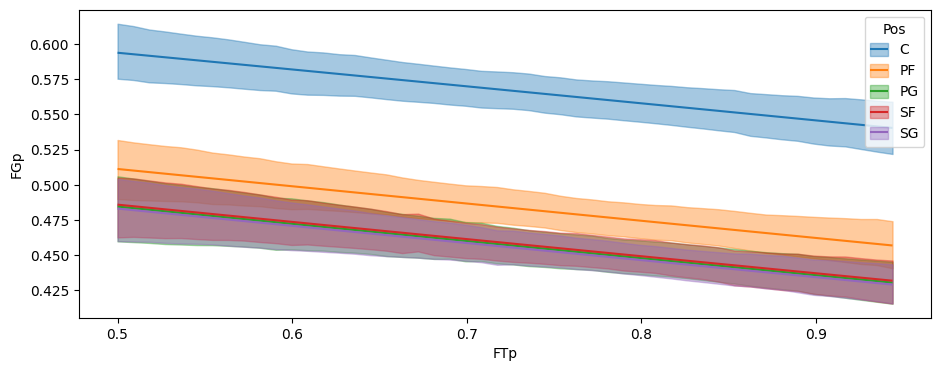

In [ ]:
bmb.interpret.plot_predictions(model_bb_bmb,
                               idata_bb_bmb,
                               ["FTp","Pos"],
                               fig_kwargs={"figsize":(11, 4)})

**The above graph just adds position in as a variable. As expected, all the slopes are the same. This probably isn't the best prediction because**

/usr/local/lib/python3.10/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='FTp', ylabel='FGp'>], dtype=object))

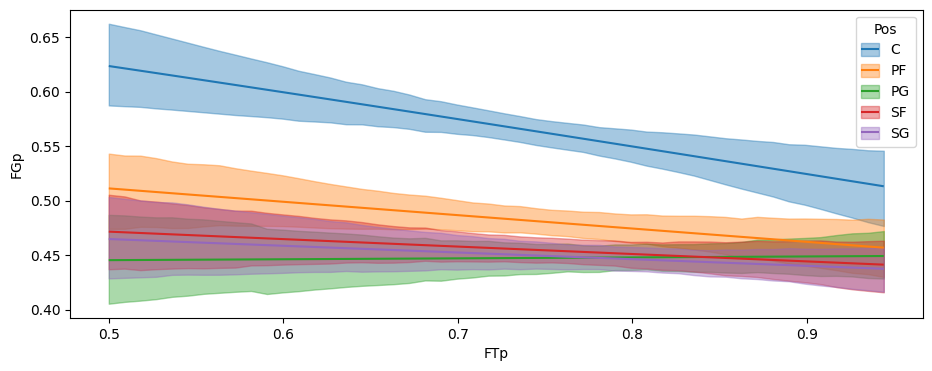

In [ ]:
bmb.interpret.plot_predictions(model_bb_h,
                               idata_bb_h,
                               ["FTp","Pos"],
                               fig_kwargs={"figsize":(11, 4)})

/usr/local/lib/python3.10/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='FTp', ylabel='FGp'>], dtype=object))

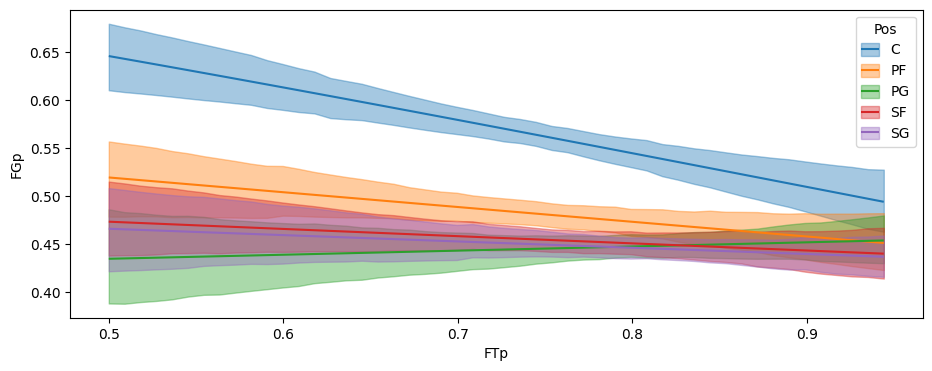

In [ ]:
bmb.interpret.plot_predictions(model_bb_inter,
                               idata_bb_inter,
                               ["FTp","Pos"],
                               fig_kwargs={"figsize":(11, 4)})

**The above two graphs use position as hierarchy and uses interaction with position and FT%. They are relatively similar, and look like more realistic predictions compared to the top graph.**

In [ ]:
cmp_df = az.compare( {"categorical_predictor":idata_bb_bmb,"hierarchical":idata_bb_h,"2_var_interact":idata_bb_inter,"3_var_interact":idata_bb_inter3,"3_var_1_interact":idata_bb_inter1} )
cmp_df

/usr/local/lib/python3.10/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
3_var_1_interact,0,507.419914,14.847324,0.000000,0.655982,17.416309,0.000000,False,log
3_var_interact,1,507.363306,14.910627,0.056608,0.000000,17.371485,0.305531,True,log
2_var_interact,2,507.079982,15.109027,0.339933,0.000000,17.319081,0.275754,False,log
hierarchical,3,506.971737,14.317837,0.448177,0.000000,17.279819,2.593093,False,log
categorical_predictor,4,505.353507,8.747512,2.066407,0.344018,16.342698,6.064874,False,log


<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

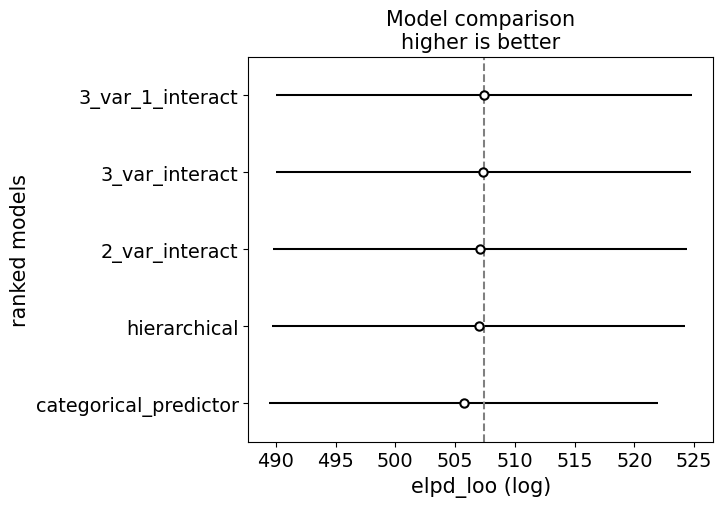

In [ ]:
az.plot_compare(cmp_df)

Looking at the elpd_loo, it seems like there is no significant difference in performance. Using three variables with one interaction gives the best elpd_loo, but just barely.

**Task11**:

Which model is "better" according to this metric?

Why do you think that is?

I think the 2 variable interaction model is the best. The elpd_loos are all almost the same, and the 2 variable interaction model is the simplest model that almost fully models the scenario. I think the assumption that all positions have the same slope for the categorical predictor model doesn't match reality, and I also think the slope and intercept of centers shouldn't be affected too much by other positions, as it is in the hierarchichal model.

In the end, though, I think using any of the ones with just 2 variables is fine. They all have almost the same elpd_loo.